# Exercises
---
Timothy Helton

---
<br>
<font color="red">
    NOTE:
    <br>
    This notebook uses code found in the
    <a href="https://github.com/TimothyHelton/k2datascience/blob/master/k2datascience/olympics.py">
    <strong>k2datascience.olympics</strong></a> module.
    To execute all the cells do one of the following items:
    <ul>
        <li>Install the k2datascience package to the active Python interpreter.</li>
        <li>Add k2datascience/k2datascience to the PYTHON_PATH system variable.</li>
        <li>Create a link to the olympics.py file in the same directory as this notebook.</li>
</font>

---
### Imports

In [1]:
from k2datascience import olympics

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

### Data Prep
---

In [2]:
oly = olympics.Medals()

print(f'{"#" * 30}\nAthletes Data\n\n')
print(f'Data Types:\n{oly.athletes.dtypes}\n\n')
print(f'Data Shape:\n{oly.athletes.shape}\n\n')
print(f'Missing Data:\n{oly.athletes.isnull().sum()}\n\n')
oly.athletes.head()
oly.athletes.tail()
oly.athletes.describe()

print(f'\n\n\n{"#" * 30}\nCountries Data\n\n')
print(f'Data Types:\n{oly.countries.dtypes}\n\n')
print(f'Data Shape:\n{oly.countries.shape}\n\n')
print(f'Missing Data:\n{oly.countries.isnull().sum()}\n\n')
oly.countries.head()
oly.countries.tail()
oly.countries.describe()

##############################
Athletes Data


Data Types:
id                  int64
name               object
country            object
sex                object
dob        datetime64[ns]
height            float64
weight            float64
sport              object
gold                int64
silver              int64
bronze              int64
dtype: object


Data Shape:
(11538, 11)


Missing Data:
id           0
name         0
country      0
sex          0
dob          1
height     330
weight     659
sport        0
gold         0
silver       0
bronze       0
dtype: int64




,id,name,country,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,1969-10-17,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,1986-09-23,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,1992-05-27,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1991-01-02,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,1990-11-26,1.81,71.0,cycling,0,0,0


,id,name,country,sex,dob,height,weight,sport,gold,silver,bronze
11533,265605954,Zurian Hechavarria,CUB,female,1995-08-10,1.64,58.0,athletics,0,0,0
11534,214461847,Zuzana Hejnova,CZE,female,1986-12-19,1.73,63.0,athletics,0,0,0
11535,88361042,di Xiao,CHN,male,1991-05-14,1.85,100.0,wrestling,0,0,0
11536,900065925,le Quoc Toan Tran,VIE,male,1989-04-05,1.60,56.0,weightlifting,0,0,0
11537,711404576,le Roux Hamman,RSA,male,1992-01-06,1.85,70.0,athletics,0,0,0


,id,height,weight,gold,silver,bronze
count,1.153800e+04,11208.000000,10879.000000,11538.000000,11538.000000,11538.000000
mean,4.999885e+08,1.766282,72.068205,0.057722,0.056769,0.061016
std,2.908648e+08,0.112719,16.177334,0.255910,0.239147,0.243320
min,1.834700e+04,1.210000,31.000000,0.000000,0.000000,0.000000
25%,2.450997e+08,1.690000,60.000000,0.000000,0.000000,0.000000
50%,5.002011e+08,1.760000,70.000000,0.000000,0.000000,0.000000
75%,7.539874e+08,1.840000,81.000000,0.000000,0.000000,0.000000
max,9.999878e+08,2.210000,170.000000,5.000000,2.000000,2.000000





##############################
Countries Data


Data Types:
country    object
code       object
dtype: object


Data Shape:
(201, 2)


Missing Data:
country    0
code       0
dtype: int64




,country,code
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,ALG
3,American Samoa*,ASA
4,Andorra,AND


,country,code
196,Vietnam,VIE
197,Virgin Islands*,ISV
198,Yemen,YEM
199,Zambia,ZAM
200,Zimbabwe,ZIM


,country,code
count,201,201
unique,201,201
top,Haiti,ANT
freq,1,1


### 1. What was the average age in male and female athletes?

In [3]:
oly.calc_age_means()

,years,months,days
sex,,,
female,25.0,5.0,15.0
male,26.0,5.0,15.0


### 2. What are the most common Dates of Birth?

*To clarify - day, month, year*

In [4]:
oly.common_full_birthday()

Most Common Athlete Birthdays

9 Athletes were born on the following dates:
1988-03-05
1990-12-20
1993-02-18


### 3. How about the most common birthdays?

- Most Common Month
- Modst Common Day

In [5]:
oly.common_month_day_birthday()

,Most Common Birthday
month,6.0
day,15.0


### 4. What are the Countries with more than 100 medals?

In [6]:
(oly.country_medals
 .query('total > 100')
 .sort_values('total', ascending=False))

,gold,silver,bronze,total
country,,,,
USA,139,54,71,264
GER,49,44,67,160
GBR,64,55,26,145
RUS,52,29,34,115
CHN,46,30,37,113


### 5. Create a bar or pie chart for the results of the previous exercise.

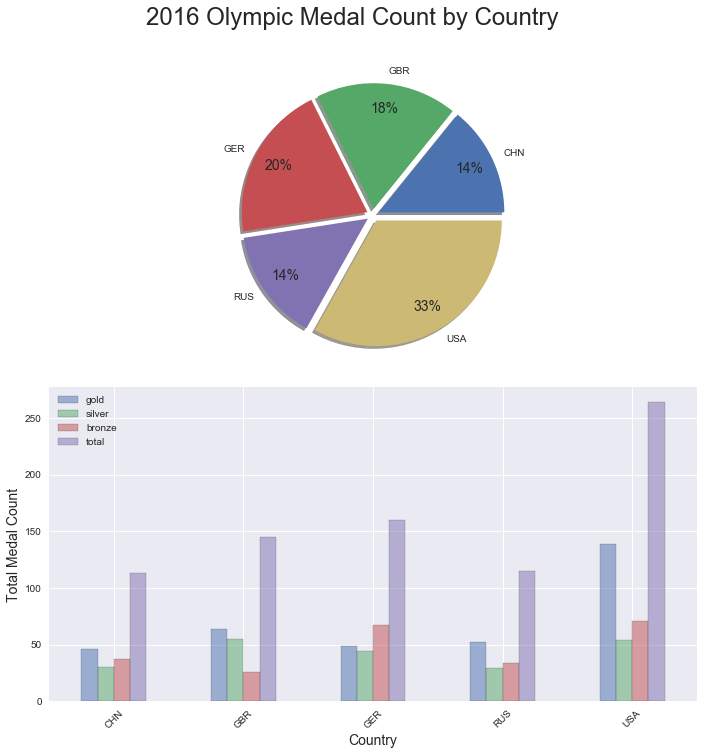

In [7]:
oly.country_medals_plot()

### 6. Male weightlifting competitions are divided into 8 weight classes. Can you estimate these weight classes by looking at the data? Hint: Create a scatter plot with Body weight on the x-axis and choose height as y.

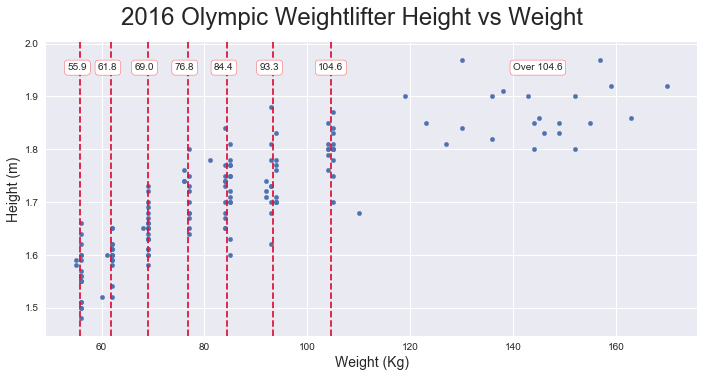

In [8]:
oly.weightlifting_classes()

The predicted weight classes are displayed in text boxes outlined in crimson.

### 7. Generate a histogram of male and female height distribution among all participants.

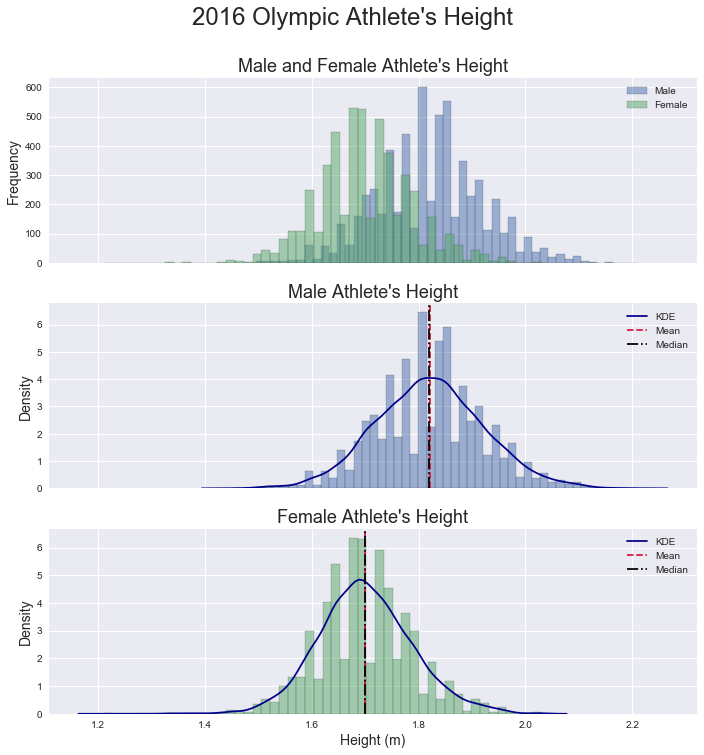

In [9]:
oly.height_histograms()

### 8. Using the Seaborn package create a box plot for male and female height distribution among all participants.

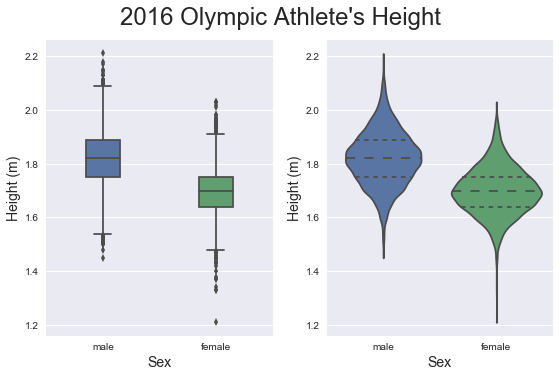

In [10]:
oly.height_boxplot()

### 9. _Optional_: What else would you try?

1. Compare type of medal compared to height.
1. Compare type of medal compared to weight.
1. Compare height vs age.
    - Are younger generation people taller or are Olympic athletes in the top percentile irregardless?
1. Which sport distributes the most medals.
1. Calculate the Body Mass Index (BMI) of the athletes.
    - Compare the BMI by sport.
1. Find the athlete that is closest to your height and mass.
1. Compare male and female heights for each sport.

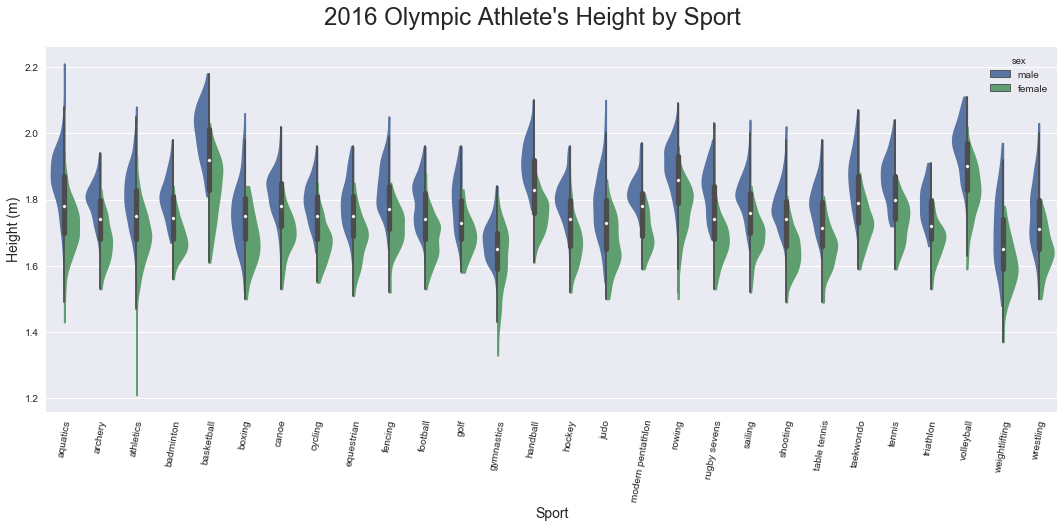

In [11]:
oly.height_sport()